In [1]:
import random
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
import pickle

In [2]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list.pkl", "rb") as f:
    cnn_attention_gru = pickle.load(f)

In [3]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list_non_tuning.pkl", "rb") as f:
    cnn_attention_gru_non_tuning = pickle.load(f)

In [4]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "rb") as f:
    standard_scaler = pickle.load(f)

In [5]:
standard_scaler

StandardScaler()

In [6]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "rb") as f:
    X_resampling = pickle.load(f)

In [7]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "rb") as f:
    y_resampling = pickle.load(f)

In [8]:
def XAI_pred(model, random_number):
    print("Data number: ", random_number)
    print("Real Label: ", y_resampling[random_number])

    pred = model.predict(X_resampling[random_number].reshape(1, 24, 1))
    prediction = np.argmax(pred)
    print("Prediction: ", prediction)
    
    analyzer = innvestigate.create_analyzer('input', cnn_attention_gru[3])
    relevance = analyzer.analyze(X_resampling[random_number].reshape(1, 24, 1))

    # Ubah ndarray menjadi list
    relevance_list = relevance.squeeze().tolist()

    # Urutkan list secara menurun
    sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

    # Ambil elemen pertama setelah diurutkan
    top_relevance = sorted_relevance[:25]

    # Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
    top_dict = {index: value for index, value in top_relevance}

    print(top_dict)

    total_relevance = sum(top_dict.values())
    print("Total relevance:", total_relevance)

    # Filter nilai yang di atas 0.0 dan ambil indeksnya
    filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

    print(filtered_indices)
    
    relevance_resized = np.resize(relevance, (1, 24, 1))

    plt.figure(figsize=(20, 5))
    plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [9]:
random_number = random.randint(0, 16031)

Model Number:  1
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


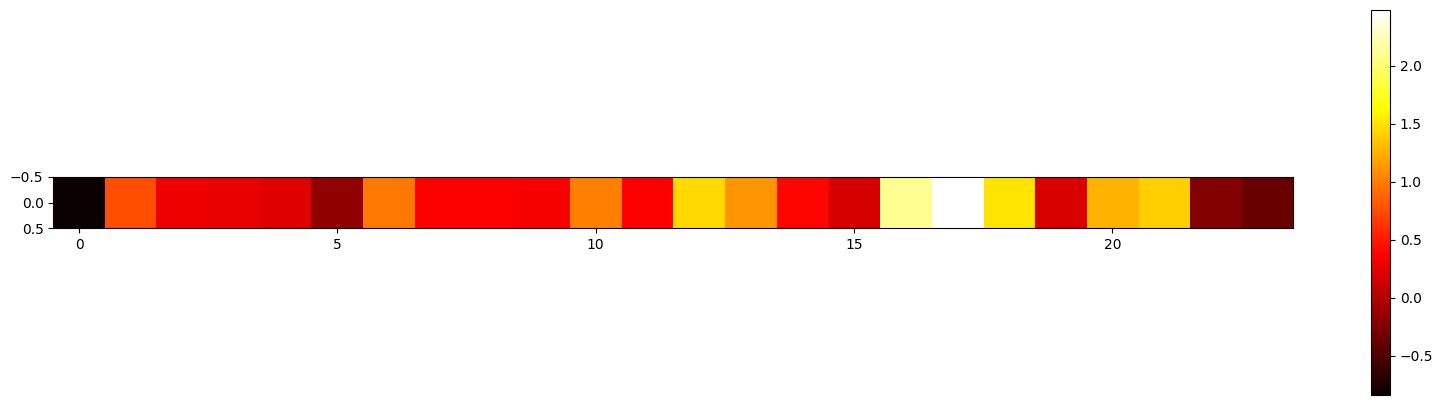

Model Number:  2
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


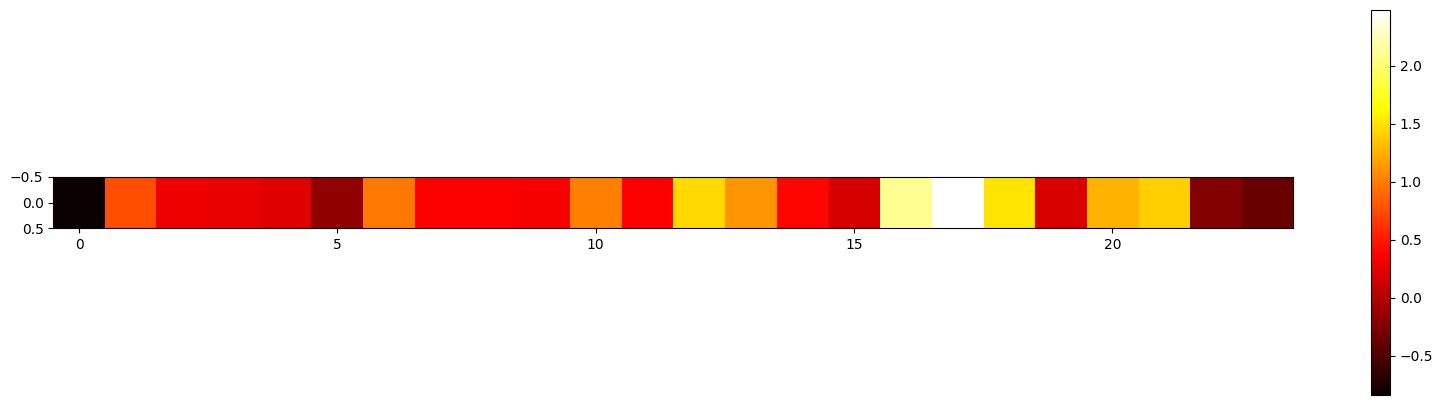

Model Number:  3
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


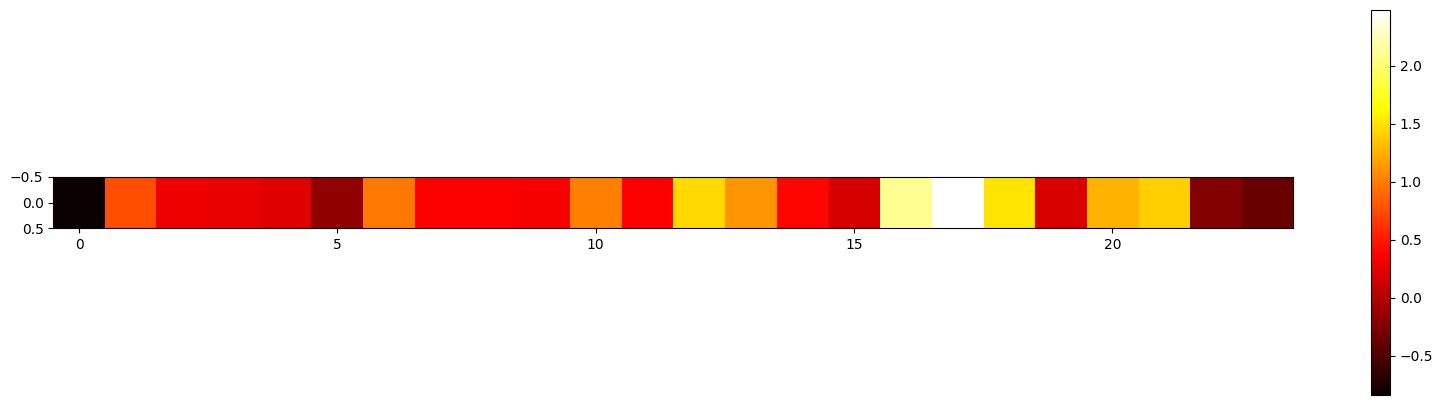

Model Number:  4
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


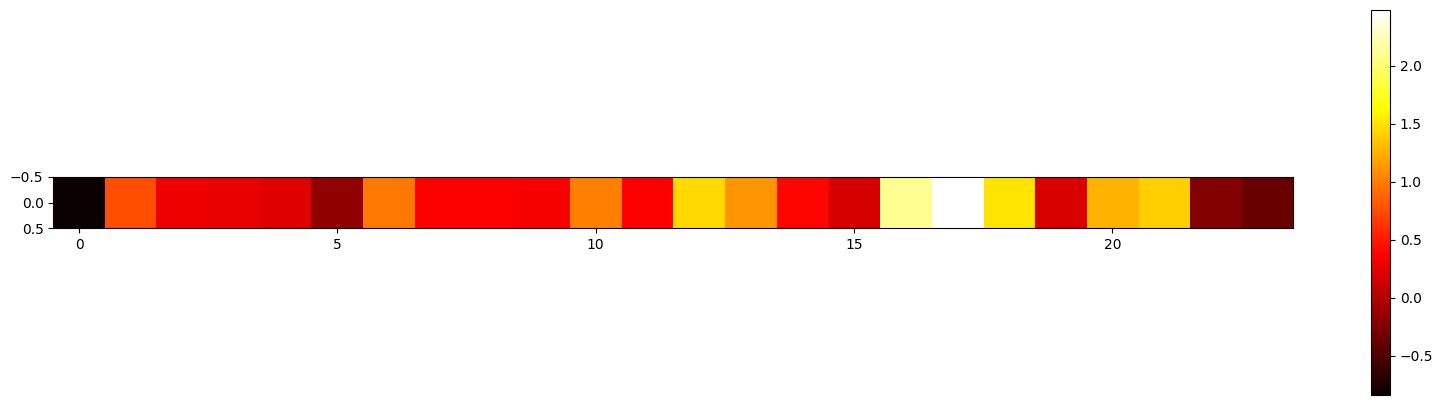

Model Number:  5
Data number:  8862
Real Label:  3
1/1 [==============================] - 2s 2s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


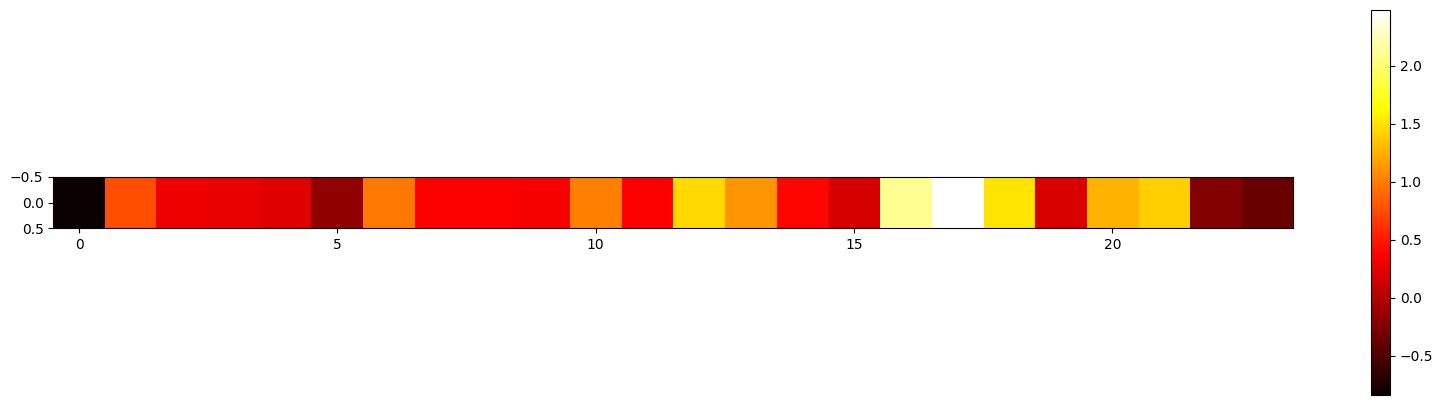

In [10]:
for i, model in enumerate(cnn_attention_gru):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)

Model Number:  1
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


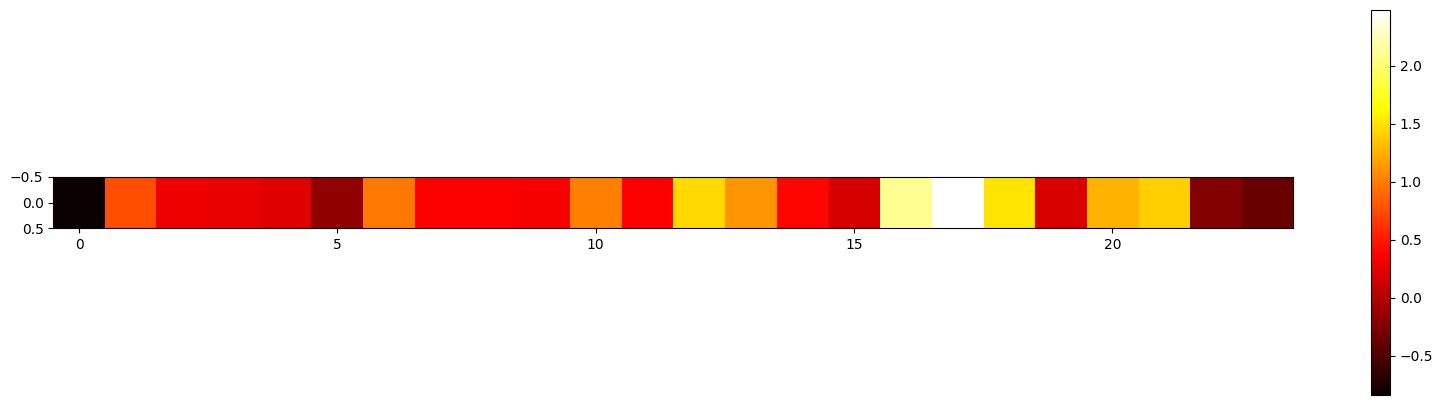

Model Number:  2
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


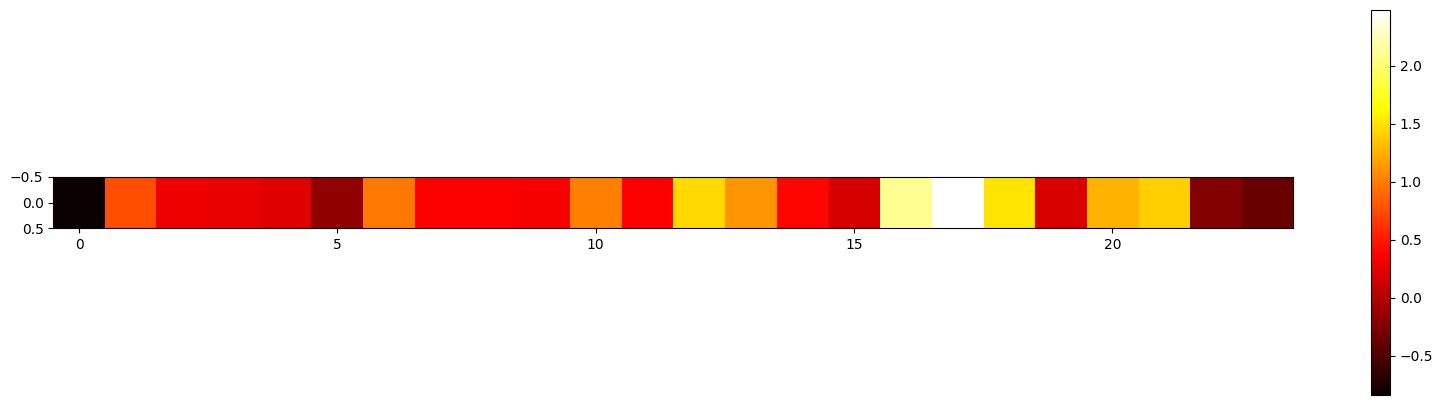

Model Number:  3
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 947ms/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


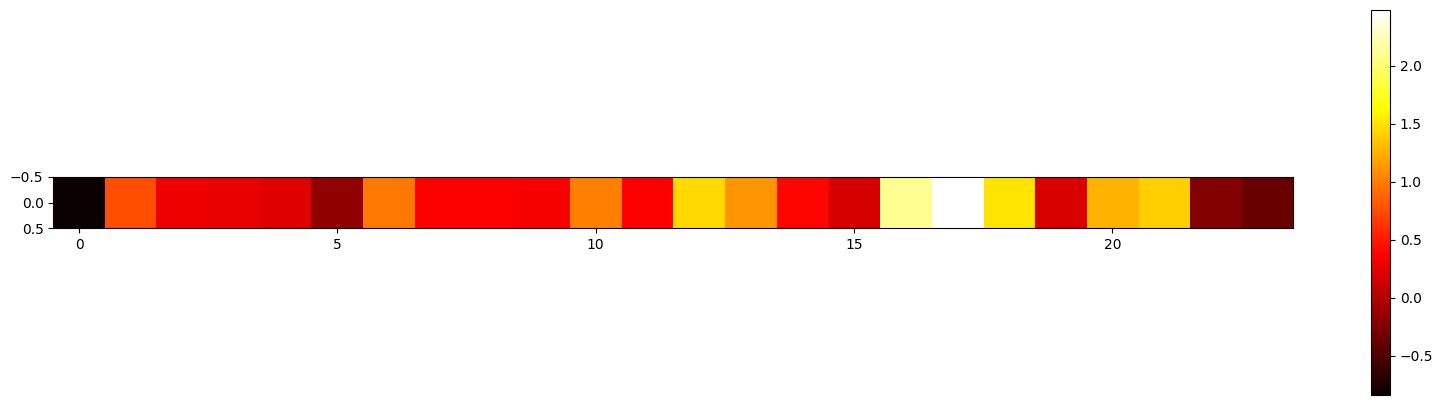

Model Number:  4
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 950ms/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


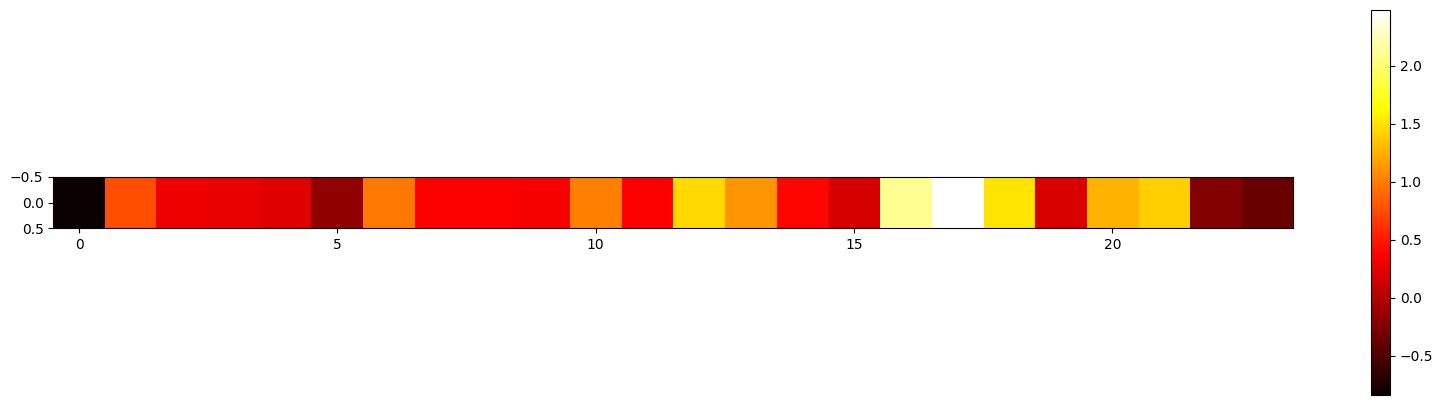

Model Number:  5
Data number:  8862
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{17: 2.481288433074951, 16: 2.107867479324341, 18: 1.503867506980896, 12: 1.444260597229004, 21: 1.397509217262268, 20: 1.2546191215515137, 13: 1.1193859577178955, 10: 1.0068011283874512, 6: 0.9714782238006592, 1: 0.7647460103034973, 14: 0.4025450646877289, 8: 0.365143746137619, 11: 0.36034977436065674, 7: 0.35899636149406433, 9: 0.3387216031551361, 2: 0.30155518651008606, 3: 0.2648572623729706, 4: 0.22043205797672272, 19: 0.18821261823177338, 15: 0.16580830514431, 5: -0.17601999640464783, 22: -0.23769913613796234, 23: -0.3708079159259796, 0: -0.8381093740463257}
Total relevance: 15.39580923318863
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


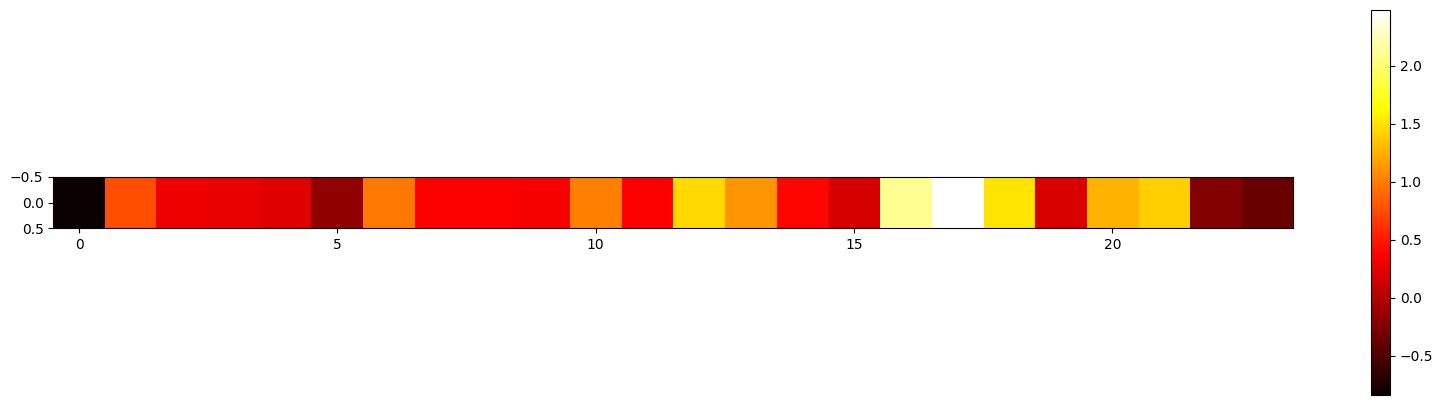

In [11]:
for i, model in enumerate(cnn_attention_gru_non_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)